In [12]:
import numpy as np
import pandas as pd 
import pandas as pd
import os 
import string
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from keras.preprocessing.text import Tokenizer
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
from tensorflow.keras.layers import Bidirectional, RNN

In [3]:
df_train = pd.read_csv('data/Train.csv')
df_test = pd.read_csv('data/Test.csv')
df_val = pd.read_csv('data/Valid.csv')

In [5]:
df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()
df_val['text'] = df_val['text'].str.lower()

df_train['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_test['text'] = df_test['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_val['text'] = df_val['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

df_train['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_test['text'] = df_test['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_val['text'] = df_val['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

train = df_train['text'].tolist()
test = df_test['text'].tolist()
val = df_val['text'].tolist()

In [6]:
bigrams = [b for l in train[:10] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
print('bigrams:',bigrams)

bigrams: [('i', 'grew'), ('grew', 'up'), ('up', 'b'), ('b', '1965'), ('1965', 'watching'), ('watching', 'and'), ('and', 'loving'), ('loving', 'the'), ('the', 'thunderbirds'), ('thunderbirds', 'all'), ('all', 'my'), ('my', 'mates'), ('mates', 'at'), ('at', 'school'), ('school', 'watched'), ('watched', 'we'), ('we', 'played'), ('played', 'thunderbirds'), ('thunderbirds', 'before'), ('before', 'school'), ('school', 'during'), ('during', 'lunch'), ('lunch', 'and'), ('and', 'after'), ('after', 'school'), ('school', 'we'), ('we', 'all'), ('all', 'wanted'), ('wanted', 'to'), ('to', 'be'), ('be', 'virgil'), ('virgil', 'or'), ('or', 'scott'), ('scott', 'no'), ('no', 'one'), ('one', 'wanted'), ('wanted', 'to'), ('to', 'be'), ('be', 'alan'), ('alan', 'counting'), ('counting', 'down'), ('down', 'from'), ('from', '5'), ('5', 'became'), ('became', 'an'), ('an', 'art'), ('art', 'form'), ('form', 'i'), ('i', 'took'), ('took', 'my'), ('my', 'children'), ('children', 'to'), ('to', 'see'), ('see', 'the')

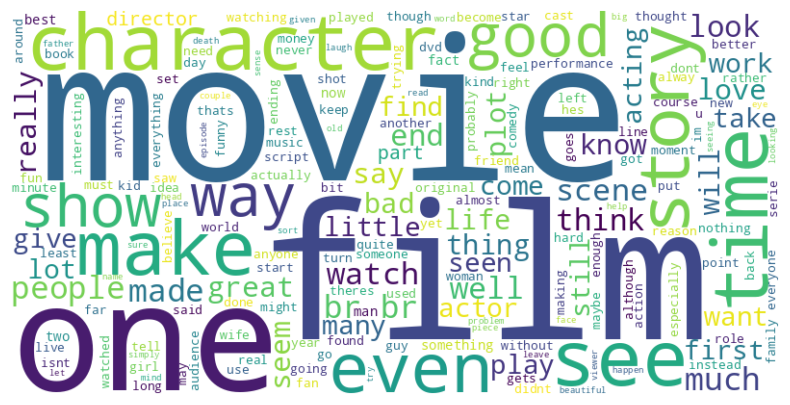

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train) 
vocab_size = len(tokenizer.word_index) + 1 

In [11]:
sequences_train = tokenizer.texts_to_sequences(train)
sequences_test = tokenizer.texts_to_sequences(test)
sequences_val = tokenizer.texts_to_sequences(val)

labels= pd.get_dummies(df_train['label']).values

In [13]:
max_review_length = 200 
sequences_train = tf.keras.utils.pad_sequences(sequences_train, maxlen=max_review_length, padding='post', truncating='post')
sequences_test = tf.keras.utils.pad_sequences(sequences_test, maxlen=max_review_length, padding='post', truncating='post')
sequences_val = tf.keras.utils.pad_sequences(sequences_val, maxlen=max_review_length, padding='post', truncating='post')

In [14]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
hist = model.fit(sequences_train,labels,epochs=1)

1250/1250 [==============================] - 65s 51ms/step - loss: 0.6842 - accuracy: 0.5462


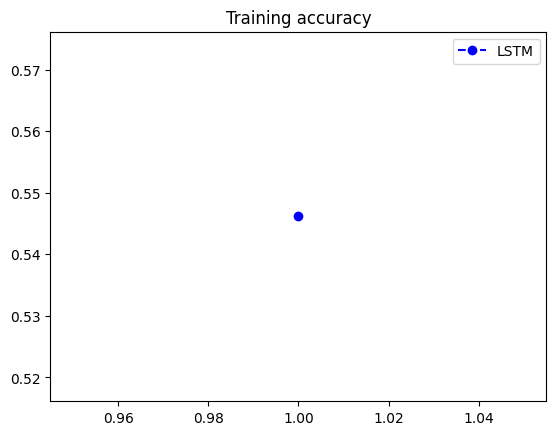

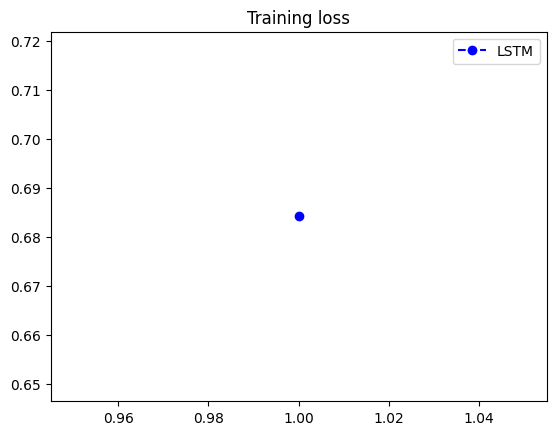

In [16]:
acc = hist.history['accuracy']
loss = hist.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo--', label='LSTM')

plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo--', label='LSTM')
plt.title('Training loss')
plt.legend()

plt.show()


In [17]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(GRU(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
hist = model.fit(sequences_train,labels,epochs=1)

1250/1250 [==============================] - 51s 40ms/step - loss: 0.6511 - accuracy: 0.5688


<Figure size 640x480 with 0 Axes>

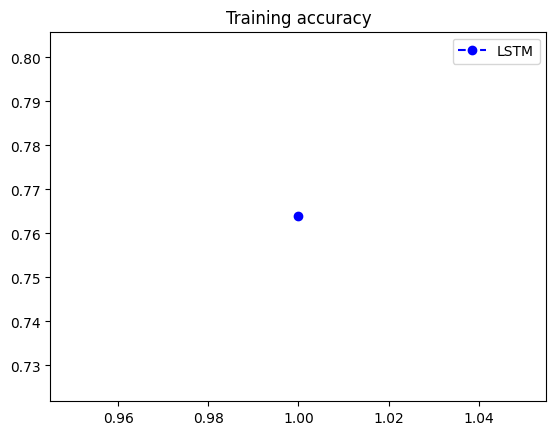

<Figure size 640x480 with 0 Axes>

In [26]:
acc = hist.history['accuracy']
loss = hist.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo--', label='LSTM')

plt.title('Training accuracy')
plt.legend()

plt.figure()


In [20]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
hist = model.fit(sequences_train,labels,epochs=1)

1250/1250 [==============================] - 58s 45ms/step - loss: 0.5042 - accuracy: 0.7638


<Figure size 640x480 with 0 Axes>

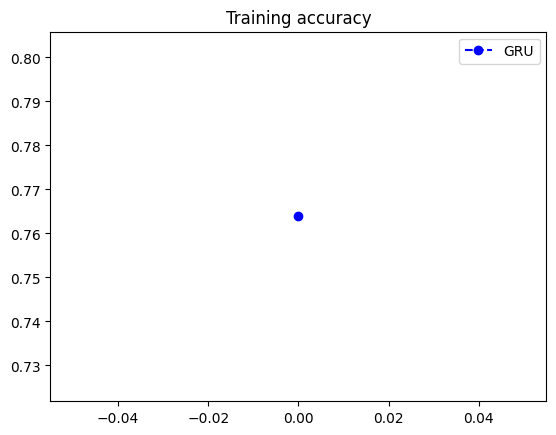

<Figure size 640x480 with 0 Axes>

In [25]:
acc = hist.history['accuracy']
loss = hist.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo--', label='GRU')

plt.title('Training accuracy')
plt.legend()

plt.figure()
